### Introduction to regression

In [14]:
import os

import pandas
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
# Read dataset

diabetes_df = pandas.read_csv(os.path.join(BASE_DIR, "week1/dataset/diabetes.csv"))
print(diabetes_df.head())           # TODO: what is head method

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
# Creating feature and target arrays

X = diabetes_df.drop("Glucose", axis=1).values
y = diabetes_df["Glucose"].values
print(f"X = {type(X)}, y = {type(y)}")

X = <class 'numpy.ndarray'>, y = <class 'numpy.ndarray'>


In [21]:
# Making predictions from a single feature

X_bmi = X[:, 3]
# TODO: 2 dimensional array is required, but what does -1 and 1 means in the reshape method? check the reshape method
X_bmi = X_bmi.reshape(-1, 1)
print(y.shape, X_bmi.shape)
print(X_bmi.shape)

(768,) (768, 1)
(768, 1)


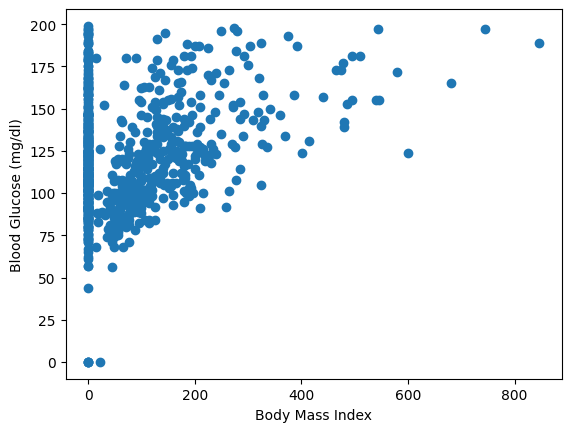

In [22]:
# Plotting glucose vs. body mass index


plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")

plt.show()

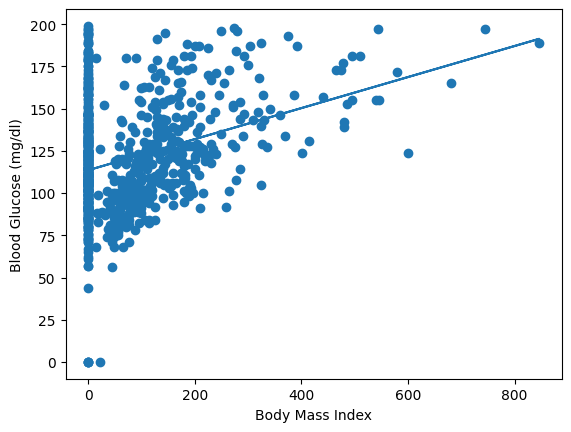

In [23]:
# Fitting a regression model

reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

### The basics of linear regression

In [27]:
# Initiate environment
import os
import pandas
import numpy as np

diabetes_df = pandas.read_csv(os.path.join(BASE_DIR, "dataset/diabetes.csv"))
X = diabetes_df.drop("Glucose", axis=1).values
y = diabetes_df["Glucose"].values

In [28]:
# Linear regression using all features

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [29]:
# R-squared in scikit-learn

reg_all.score(X_test, y_test)

0.28280468810375115

In [30]:
# RMSE in scikit-learn
# TODO:MSE & RMSE -> study about what they are
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

26.341459582232265

### Cross-validation

In [31]:
# in scikit-learn

from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

In [32]:
# Evaluating cross-valication performance

print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
0.3190969786734479 0.0701532061011419
[0.24088592 0.41580685]


### Regularized regression

In [33]:
# Ridege regression

from sklearn.linear_model import Ridge

scores = []

for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.28284666232222233, 0.28320633574804766, 0.2853000732200003, 0.26423984812668155, 0.19292424694100963]


In [34]:
# Lasso regression

from sklearn.linear_model import Lasso

scores = []

for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.2831114455475573, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


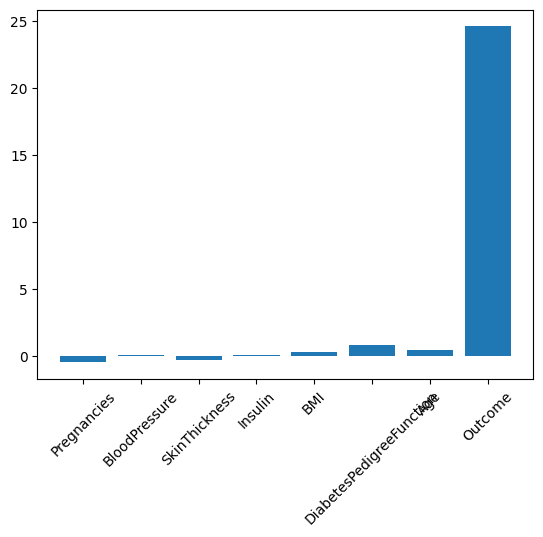

In [35]:
# Lasso for feature selection in sciket-learn

from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

X = diabetes_df.drop("Glucose", axis=1).values
y = diabetes_df["Glucose"].values
names = diabetes_df.drop("Glucose", axis=1).columns

lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()